In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from matplotlib import colors

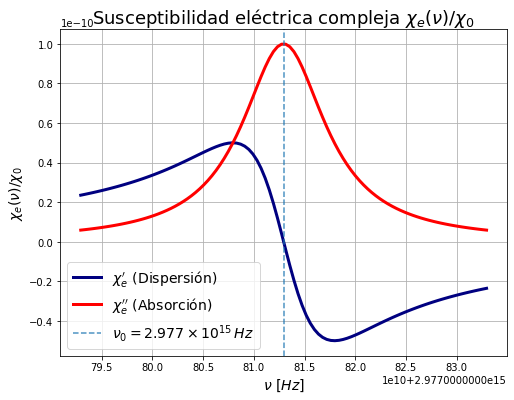

In [6]:
λ = 633e-09
n0 = (2*np.pi*3*10**8)/λ
dn = 10e9

def xe(n):
    return n0*((n0**2 - n**2 + 1j*n*dn)/(((n0**2 - n**2)**2) + (n**2) * (dn**2)))

nn = np.linspace(n0-2*dn,n0+2*dn,100)

x_dis = [xe(n).real for n in nn]
x_abs = [xe(n).imag for n in nn]
nn0 = [n0 for n in nn]

plt.figure(figsize=(8,6))
plt.plot(nn,x_dis,c="navy",lw="3",label=r"$\chi_e^{\prime}$ "+ "(Dispersión)")
plt.plot(nn,x_abs,c="red",lw="3",label=r"$\chi_e^{\prime \prime}$ " + "(Absorción)")
plt.axvline(x = n0, ls="--", label=r"$\nu_0 =$"+ r"$2.977 \times 10^{15} \, Hz$",alpha=0.8)
plt.title("Susceptibilidad eléctrica compleja "+r"$\chi_e(\nu)/\chi_0$",size=18)
plt.xlabel(r"$\nu$ [$Hz$]",size=14)
plt.ylabel(r"$\chi_e(\nu)/\chi_0$",size=14)
plt.legend(fontsize=14)
plt.grid()
plt.savefig("xe.pdf",bbox_inches="tight")

Text(0, 0.5, '$x$')

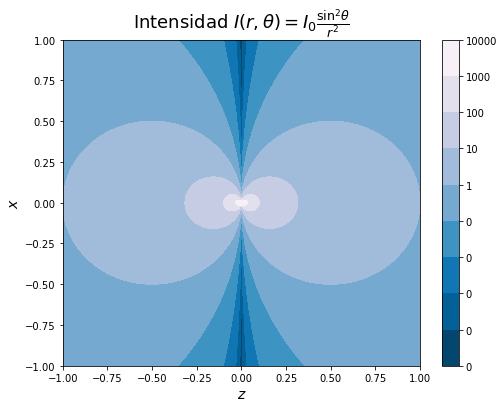

In [2]:
def rr(x,z):
    return np.sqrt(x**2+z**2)

def tt(x,z):
    if x==0:
        if z>0:
            return np.pi/2
        if z<0:
            return 3*np.pi/2
        if z==0:
            return 0
    if (x>0) & (z>=0):
        return np.arctan(z/x)
    if x<0:
        return np.arctan(z/x) + np.pi
    if (x>0) & (z<0):
        return np.arctan(z/x) +2*np.pi

def I(x,z):
    return ((np.sin(tt(x,z)))**2)/(rr(x,z)**2)

xx = np.linspace(-1,1,200)
zz = np.linspace(-1,1,200)

M = np.zeros((len(xx),len(zz)))

for x in range(len(xx)):
    for z in range(len(zz)):
        M[x,z]=I(xx[x],zz[z])

plt.figure(figsize=(8,6))
plt.contourf(zz,xx,M,locator=ticker.LogLocator(), cmap=cm.PuBu_r)
plt.colorbar()
plt.title("Intensidad "+r"$I(r,\theta) = I_0 \frac{\sin^2{\theta}}{r^2}$",size=18)
plt.xlabel(r"$z$",size=14)
plt.ylabel(r"$x$",size=14)
#plt.savefig("cm2.pdf",bbox_inches="tight")

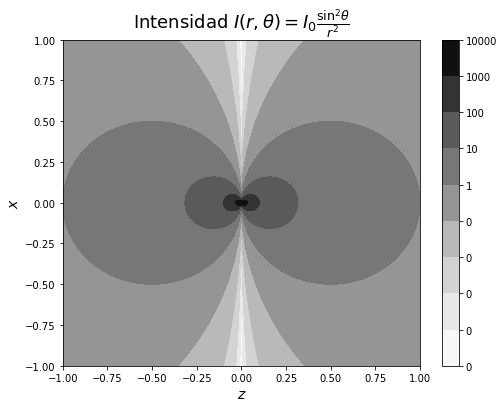

In [37]:
plt.figure(figsize=(8,6))
plt.contourf(zz,xx,M,locator=ticker.LogLocator(), cmap='Greys')
plt.colorbar()
plt.title("Intensidad "+r"$I(r,\theta) = I_0 \frac{\sin^2{\theta}}{r^2}$",size=18)
plt.xlabel(r"$z$",size=14)
plt.ylabel(r"$x$",size=14)
#plt.savefig("cm3.pdf",bbox_inches="tight")

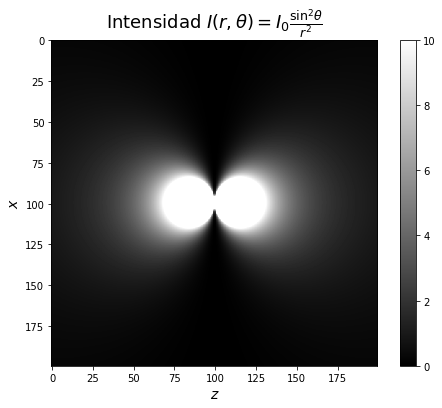

In [38]:
plt.figure(figsize=(8,6))
plt.imshow(M,cmap='gray',vmin=0, vmax=10)
plt.colorbar()
plt.title("Intensidad "+r"$I(r,\theta) = I_0 \frac{\sin^2{\theta}}{r^2}$",size=18)
plt.xlabel(r"$z$",size=14)
plt.ylabel(r"$x$",size=14)
#plt.savefig("cm4.pdf",bbox_inches="tight")